In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
import keras
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow.keras.preprocessing.image

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [3]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from glob import glob
from matplotlib import pyplot as plt



In [4]:
base_dir=r"E:\Data\B AND NOT B"

In [5]:
IMAGE_SIZE=250
BATCH_SIZE=8

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    
    validation_split=0.1
)
    

In [6]:
  
train_genarator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
    

) 

Found 2994 images belonging to 2 classes.
Found 426 images belonging to 2 classes.


In [7]:
folders=glob(r"E:\Data\B AND NOT B\*")
print(len(folders))

2


In [8]:
tf.keras.backend.clear_session()

In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(250,250,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(3,3)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=2,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 128)     147584    
                                                        

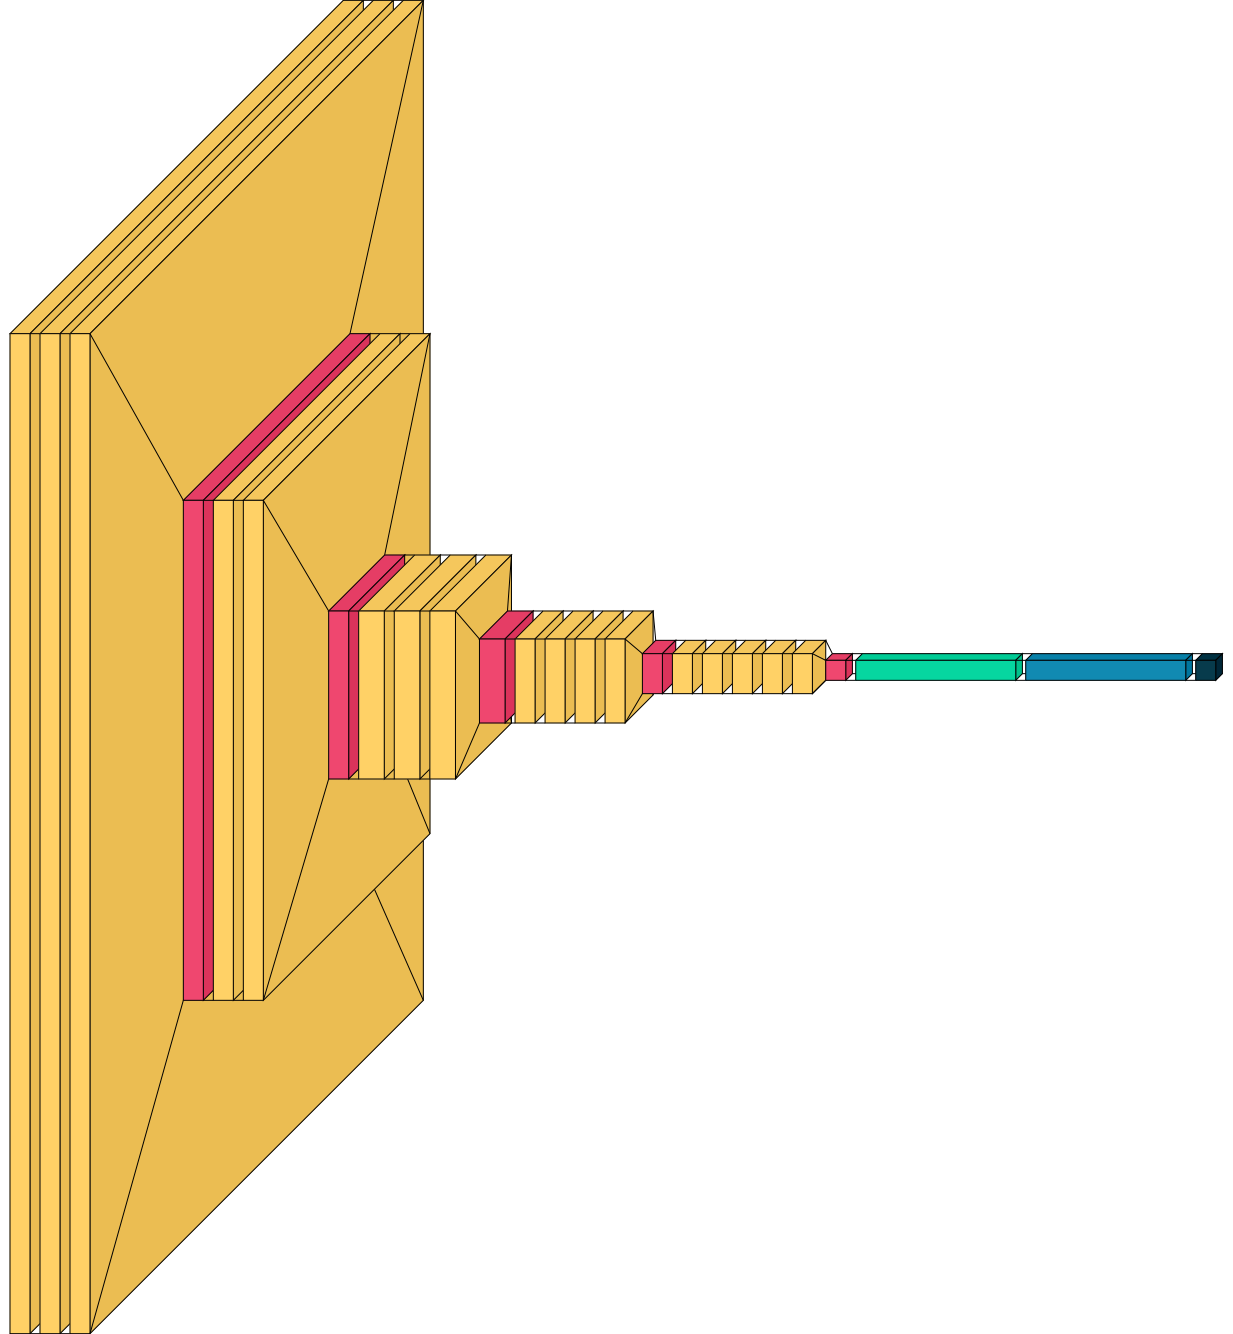

In [12]:
visualkeras.layered_view(model)

In [13]:
#from tensorflow.keras.utils import plot_model
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import Model

#from tensorflow.keras.utils import plot_model
#from tensorflow.keras.layers import Input, Dense, BatchNormalization
#from IPython.core.display import Image

In [14]:
#keras.utils.plot_model(model, show_shapes=True)

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import datetime

In [16]:
learn_control = ReduceLROnPlateau(monitor='accuracy', patience=5,
                                  verbose=0,factor=0.1, min_lr=1e-7)
earlyStopping = EarlyStopping(monitor='accuracy', patience=5, verbose=0, mode='max')
#mcp_save = ModelCheckpoint(r'C:\Users\faysa\Desktop\Flower_Recognition\final\model1_mcp.hdf5', save_best_only=True, monitor='val_loss', mode='min')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epoch=1

history = model.fit(train_genarator,
                 steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

375/375 [==============================] - 3936s 10s/step - loss: 0.5504 - accuracy: 0.7966 - val_loss: 0.5030 - val_accuracy: 0.7981


In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


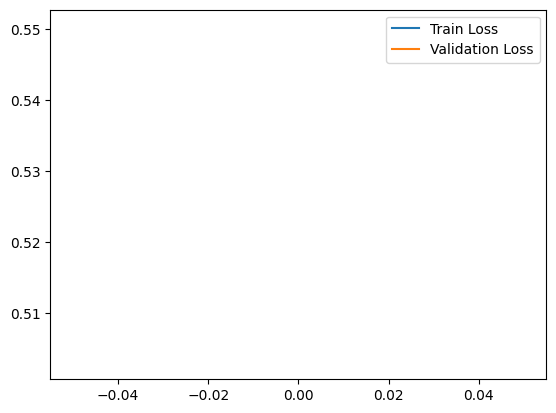

In [25]:
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

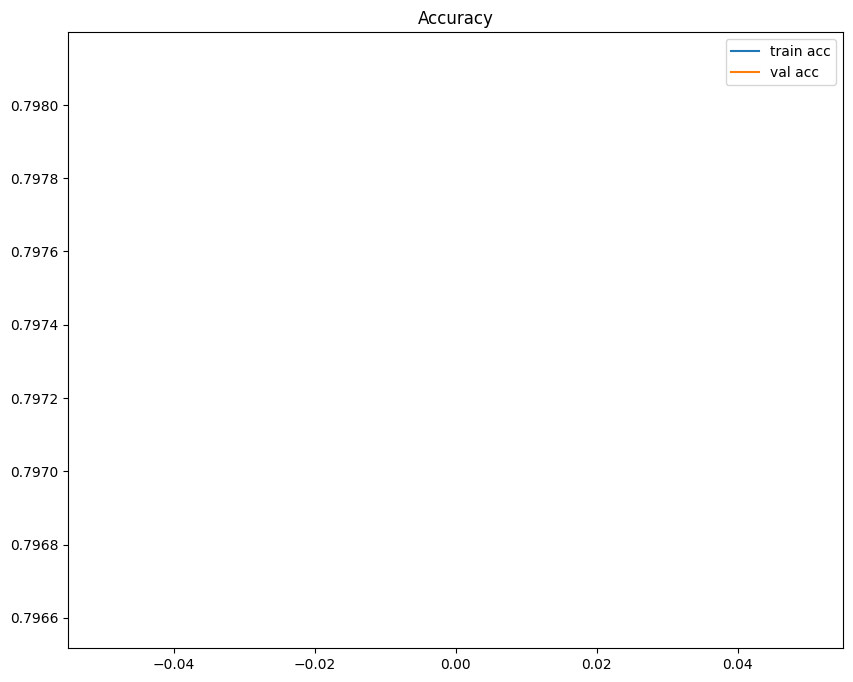

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [26]:
classes=['Fully Bloom','Not Fully Bloom']

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [30]:
img_pred=tf.keras.preprocessing.image.load_img(r"E:\Intern\Whole\310194937_1145158623089380_3146865070813762354_n.jpg",target_size = (250,250))
img_pred=tf.keras.preprocessing.image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255

preds= [model.predict(img_pred)]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

print(m1)

classes[p1]


1/1 [==============================] - 0s 375ms/step
[array([[0.7947981 , 0.20520194]], dtype=float32)]
0.7947981


'Fully Bloom'